In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv(r"C:\Users\91962\Downloads\Fraud.csv", low_memory= False)

In [19]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#### step : timestep
#### type : type of transaction : CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
#### amount : local currency
#### nameOrig : customer who started transaction
#### oldbalanceOrg : initial balance before transaction
#### newbalanceOrig : balance after transaction
#### oldbalanceDest : initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
#### newbalanceDest : new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
#### isFraud : This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
#### isFlaggedFraud : The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [21]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### no null values

In [22]:
df.rename(columns = {'nameOrig' : 'initiator', 
                        'oldbalanceOrg' : 'prev_bal_of_initiator', 
                        'newbalanceOrig' : 'new_bal_of_initiator', 
                        'nameDest' : 'receipent', 
                        'oldbalanceDest' : 'prev_bal_of_receipent',
                        'newbalanceDest' : 'new_bal_of_receipent',
                        }, inplace = True)

In [23]:
df.head()

,step,type,amount,initiator,prev_bal_of_initiator,new_bal_of_initiator,receipent,prev_bal_of_receipent,new_bal_of_receipent,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### there are no missing values
#### lets start see unique classes in object columns and go ahead for EDA

In [27]:
print("unique initiators", df.initiator.nunique(), "\nUnique reciepents",df.receipent.nunique()) 

unique initiators 6353307 
Unique reciepents 2722362


#### insight 1 : 
 > we have very less number of unique receipents compared to initiators, which means there are many common receipents among initiators, <br>can be <b>business owners, vendors or fraudelent receipents</b>

In [31]:
df.describe().map(lambda x: '{:,.0f}'.format(x))

,step,amount,prev_bal_of_initiator,new_bal_of_initiator,prev_bal_of_receipent,new_bal_of_receipent,isFraud,isFlaggedFraud
count,"6,362,620","6,362,620","6,362,620","6,362,620","6,362,620","6,362,620","6,362,620","6,362,620"
mean,243,"179,862","833,883","855,114","1,100,702","1,224,996",0,0
std,142,"603,858","2,888,243","2,924,049","3,399,180","3,674,129",0,0
min,1,0,0,0,0,0,0,0
25%,156,"13,390",0,0,0,0,0,0
50%,239,"74,872","14,208",0,"132,706","214,661",0,0
75%,335,"208,721","107,315","144,258","943,037","1,111,909",0,0
max,743,"92,445,517","59,585,040","49,585,040","356,015,889","356,179,279",1,1


#### if we consider each step as hour, 743/24 = 30.9~31 days or data of a month

In [71]:
df[df.amount == 0].shape

(16, 7)

In [73]:
indexes = df[df.amount == 0].index
df.drop(indexes, axis = 0, inplace = True)

In [72]:
df.drop_duplicates(inplace = True)

# EDA
## univariate analysis

<Figure size 1600x900 with 0 Axes>

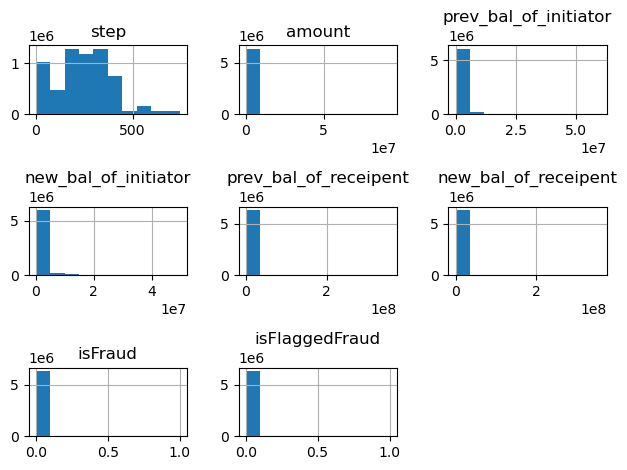

In [35]:
df.hist()
plt.tight_layout()
plt.show()

### most values are close to 0 or very less than 10^7, try seeing distribution through box plots

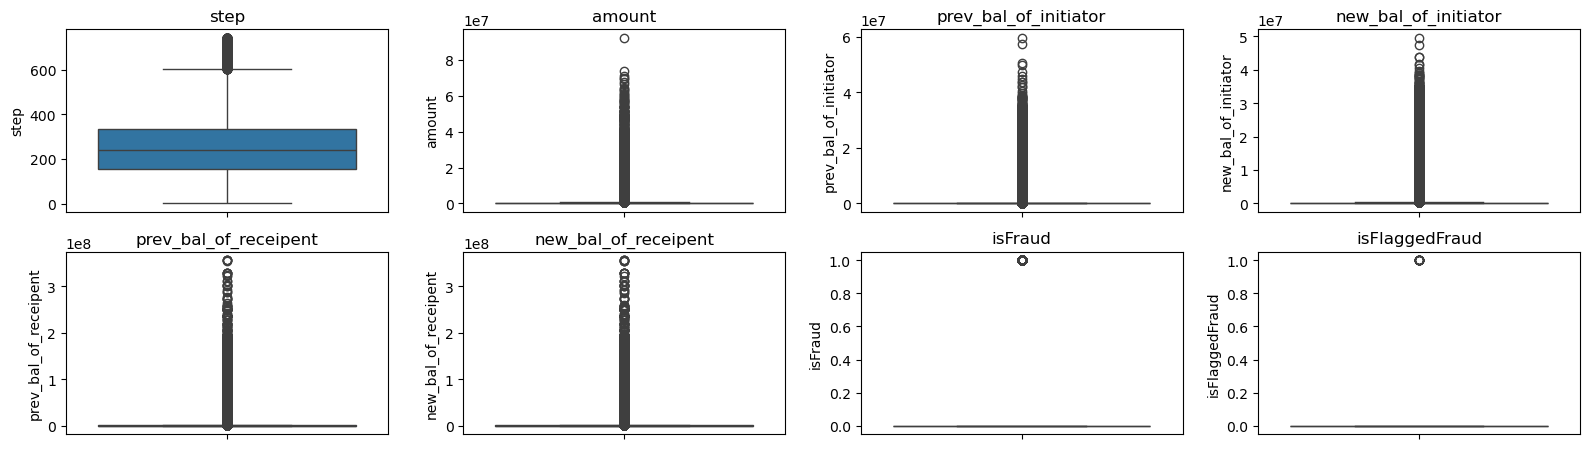

In [38]:
num = df.select_dtypes(include = ["float64", "int64"])
num = num.columns

plt.figure(figsize = (16, 9))
for i, j in enumerate(num):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df[j])
    plt.title(j)

plt.tight_layout()
plt.show()

### insight 2:
> most outliers are high values and most values are very less compared to outliers, we should find a way to handle and flag this outliers.

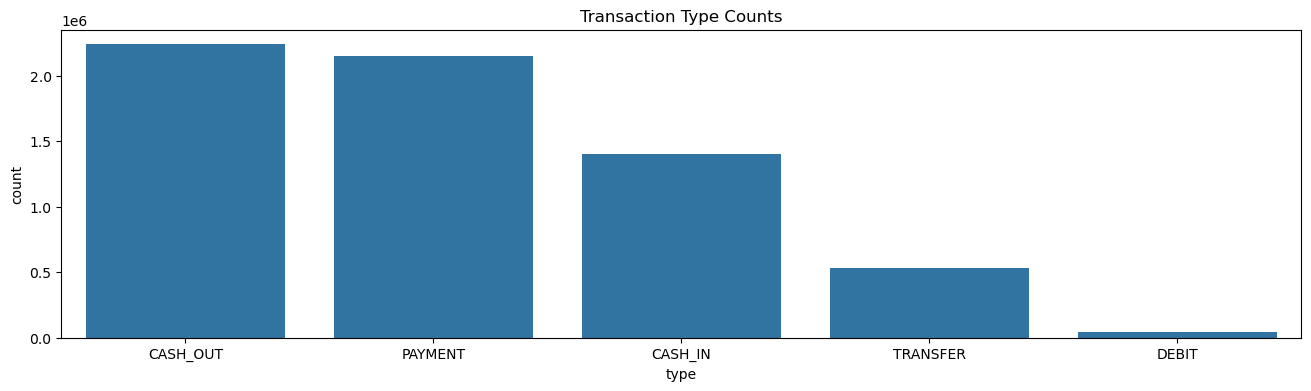

In [44]:
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']
plt.figure(figsize = (16, 4))
sns.barplot(x='type', y='count', data=type_counts)
plt.title("Transaction Type Counts")
plt.show()

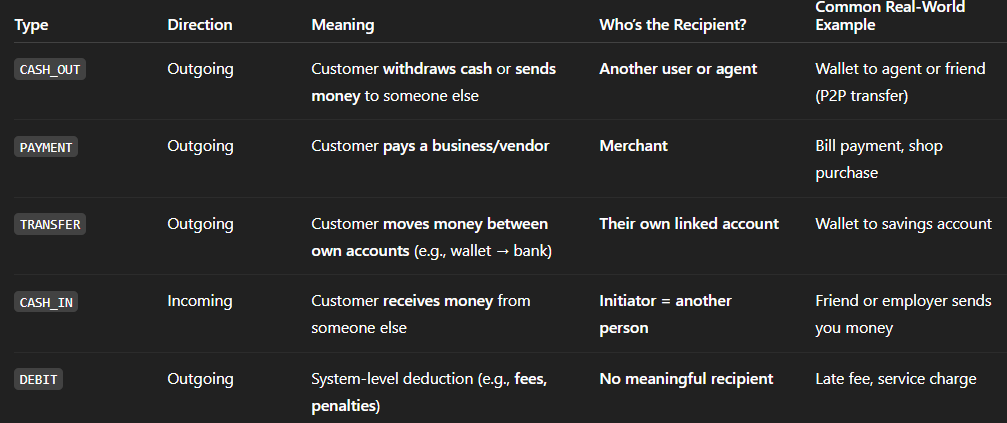

### insight 3:
> 1. most transactions are cash-out and payment ones
> 2. debit is minimum used transaction since it is system level deduction or service charge so its obvious.

## bi-variate analysis

#### its mentioned that customer that starts with M doesnt have receipents acc tracking and likely all 0. 
#### still the diff between both balance should be equal to transaction amount

In [57]:
df['diff_initiator'] = abs(df['prev_bal_of_initiator'] - df['new_bal_of_initiator'])
df['diff_receipent'] = abs(df['new_bal_of_receipent'] - df['prev_bal_of_receipent'])

# get boolean rep
df['initiator_matches'] = df['diff_initiator'] == df['amount']
df['receipent_matches'] = df['diff_receipent'] == df['amount']

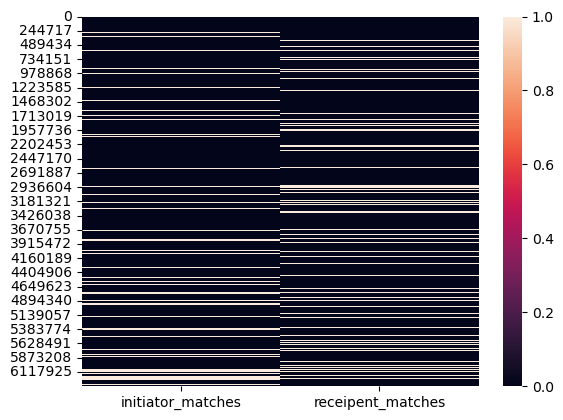

In [58]:
sns.heatmap(df[['initiator_matches', 'receipent_matches']])
plt.show()

### insight 4
> - very less amount of difference match with transcation amount <br>
> - probably because we dont have True information or information is missing <br>
> - this chart rise questions about quality of data, since this logic should hold true here and whole graph should be white. But it isnt. <br>
> - I will drop these 4 columns [<b>prev_bal_of_initiator,	new_bal_of_initiator,	prev_bal_of_receipent,	new_bal_of_receipent</b>] from analysis or machine learning model since they dont add predictive value to data
> - also even if this was whole graph was white I dont think this features have helped in anyway because all the information provided in these 4 features is already in <b>amount</b> feature

In [59]:
df.drop(['prev_bal_of_initiator', 'new_bal_of_initiator', 'prev_bal_of_receipent', 'new_bal_of_receipent'], axis = 1, inplace = True)

In [61]:
df.drop(['diff_initiator',	'diff_receipent'], axis = 1, inplace = True)

In [63]:
df.drop(['initiator_matches', 'receipent_matches'], axis = 1, inplace = True)

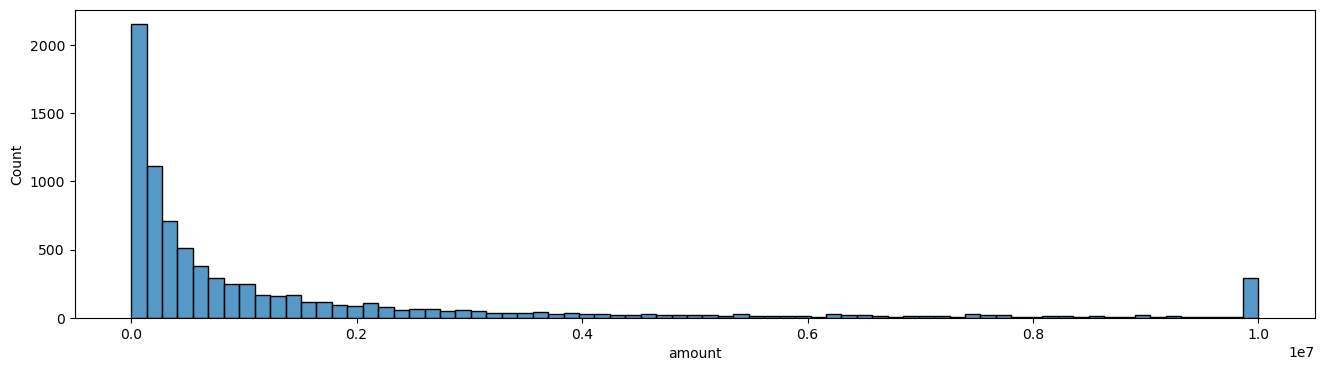

In [95]:
plt.figure(figsize = (16, 4))
sns.histplot(df[df.isFraud==1]['amount'])
plt.show()

### insight 5:
> 1. Fraudsters are more commonly targeting small to mid-sized transactions
> 2. They're avoiding detection by staying under red-flag thresholds.

## multi-variate analysis

In [70]:
aux = df.groupby(['step', 'type']).agg({'amount' : 'sum'})

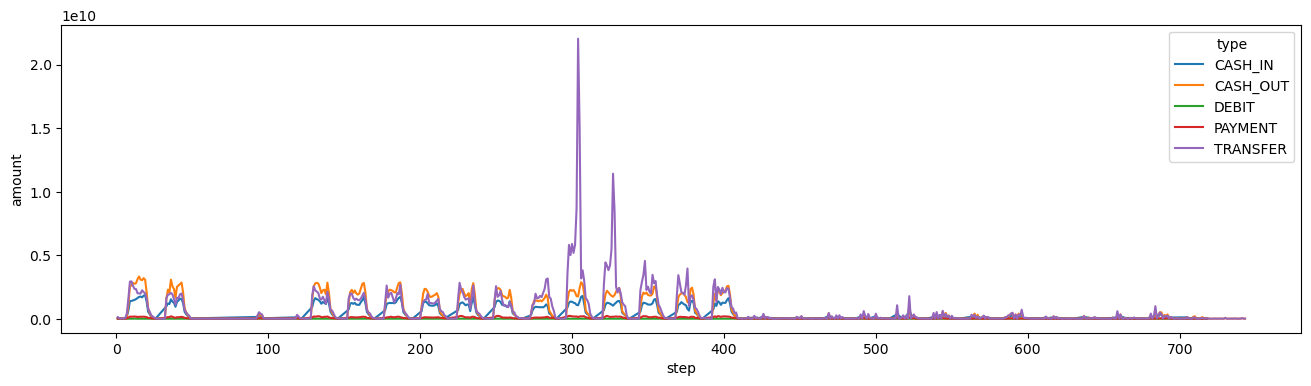

In [69]:
plt.figure(figsize = (16, 4))
sns.lineplot(data = aux, x = 'step', y = 'amount', hue = "type")
plt.show()

### insight 6:
> - for some time we see periodic and approximately close amount of transaction in all transaction types, there are more spikes in transfer type,but what might be the reason for this periodic data ? since periodic transaction type indicate some form of normality <br>
> - since this is aggregated data for all transaction types, we can hypothesize that abnormality in transaction during certain periods indicates fraud transactions

### lets check frequency of fraudulent transactions

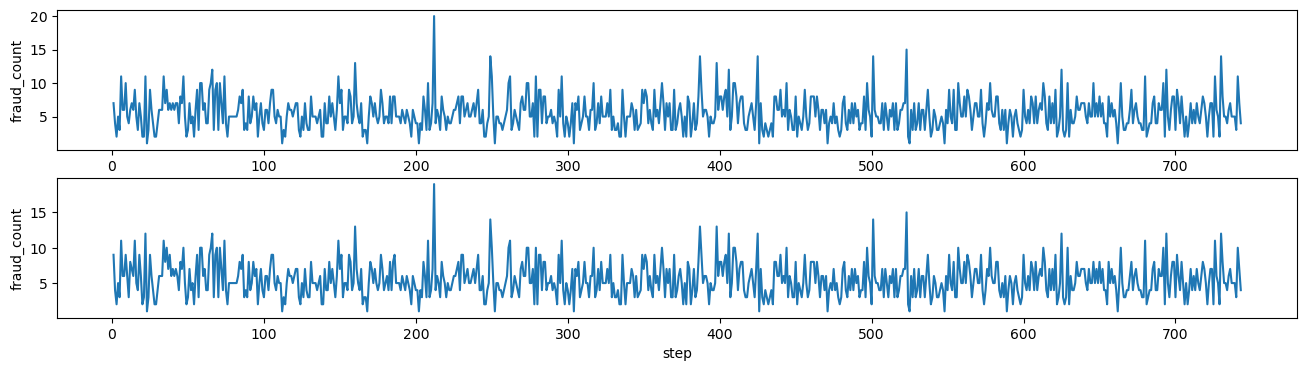

In [106]:
plt.figure(figsize = (16, 4))
aux1 = df[(df.isFraud == 1) & (df.type == 'TRANSFER')].groupby('step')[['amount']].count().rename(columns={'amount': 'fraud_count'})
aux2 = df[(df.isFraud == 1) & (df.type == 'CASH_OUT')].groupby('step')[['amount']].count().rename(columns={'amount': 'fraud_count'})

plt.subplot(2, 1, 1)
sns.lineplot(aux1, x = 'step', y = 'fraud_count')

plt.subplot(2, 1, 2)
sns.lineplot(aux2, x = 'step', y = 'fraud_count')
plt.show()

### insight 7:
> fraud count at each hour stays within [1, 20] range<br>
> both charts look identical, lets see the difference betweeen fraudlent transaction at each step

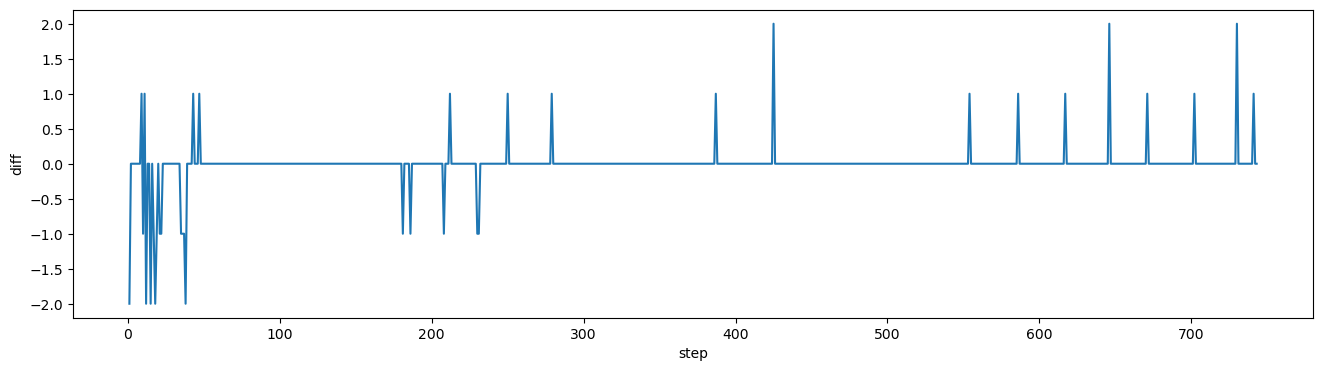

In [109]:
plt.figure(figsize = (16, 4))
aux1['diff'] = aux1['fraud_count'] - aux2['fraud_count']
sns.lineplot(aux1, x = 'step', y = 'diff')
plt.show()

### insight 8:
> this is unusual, the difference between fraudulent transaction of both type have difference of range [-2, 2].
> <b>probably because data is simulated and doesnt matter in our problem</b>

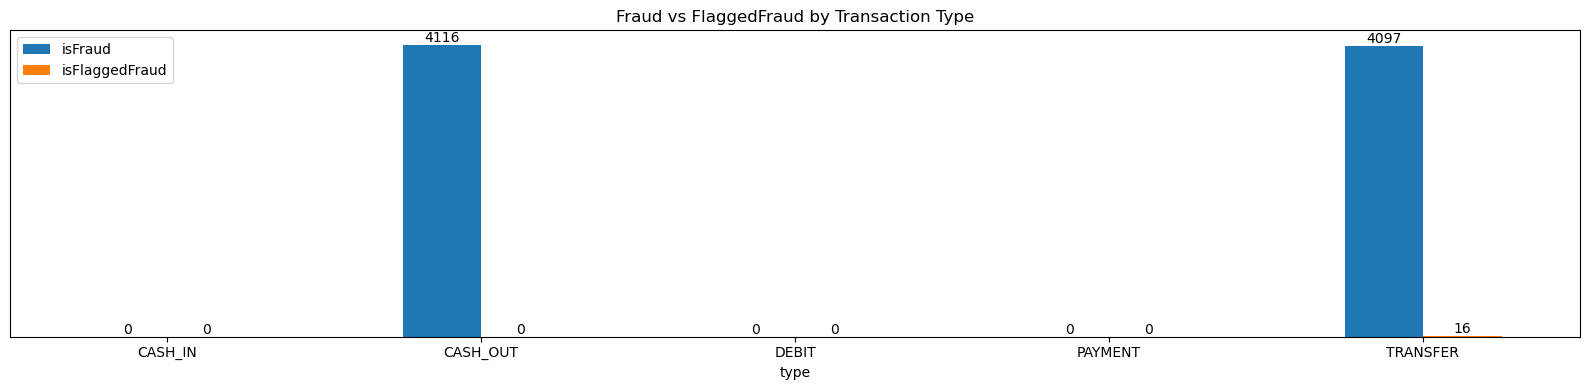

In [53]:
ax = aux.plot(kind='bar', figsize=(16, 4))
plt.title("Fraud vs FlaggedFraud by Transaction Type")
plt.xticks(rotation=0)
ax.yaxis.set_visible(False)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

### insight 9:
> - All frauds are either cash_out or transfer types.<br>
> - business models flagging system is not benefecial since it only flags transactions above 200,000 as abnormal, which not might be the case. <br>
> - frauds can also happen in small many transactions<br>
> - Also most of the fraud transactions are not flagged.

### receipent vs fraud

In [82]:
aux = df[['receipent']][df.isFraud == 1]
print("total fraudulent receipents :", aux.shape[0])
i, j = 0, 0
for x in aux['receipent']:
    if 'C' in x:
        i +=1
    else:
        j +=1
print("Merchant accounts in fraudlent transactions are {} and non merchant accounts are {}".format(j, i))

total fraudulent receipents : 8197
Merchant accounts in fraudlent transactions are 0 and non merchant accounts are 8197


### insight 10:
> 1. All fraudulent accounts are non merchant accounts

### action :
> create a binary feature showing whether the account is merchant or non merchat.

In [86]:
df['non-merchant-receipent'] = df['receipent'].apply(lambda x : 1 if "C" in x else 0)

### get relation between fraudelent and non merchant account

<Axes: >

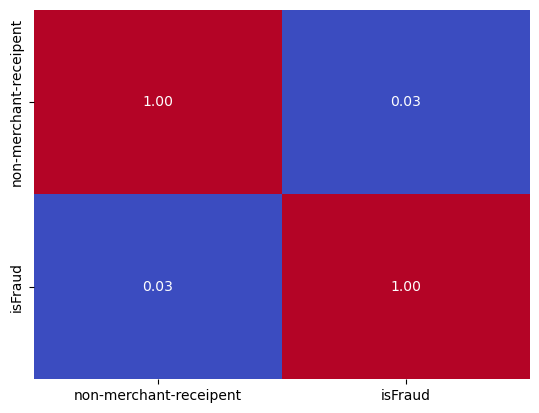

In [91]:
aux = df[['non-merchant-receipent', 'isFraud']].corr()
sns.heatmap(aux, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)

### insight 11:
> corelation is 0.03 which is non existent; should be considered in ml data frame
### action:
> drop added feature 

In [92]:
df.drop('non-merchant-receipent', axis = 1, inplace = True)

In [93]:
df.head()

,step,type,amount,initiator,receipent,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,M1979787155,0,0
1,1,PAYMENT,1864.28,C1666544295,M2044282225,0,0
2,1,TRANSFER,181.00,C1305486145,C553264065,1,0
3,1,CASH_OUT,181.00,C840083671,C38997010,1,0
4,1,PAYMENT,11668.14,C2048537720,M1230701703,0,0


<Axes: xlabel='receipent', ylabel='count'>

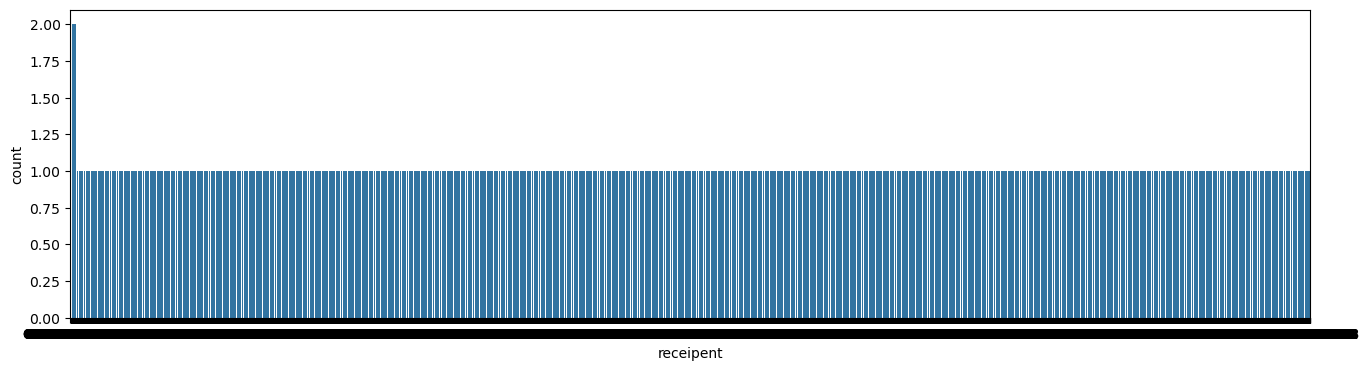

In [111]:
plt.figure(figsize = (16, 4))
sns.barplot(df[df.isFraud == 1].receipent.value_counts())
plt.show()

### insight 12:
> the fraudelent transaction isnt dependend on account number, they use new accounts every time to fraud payment, so its not possible to flag receipents account
### Action :
> initiator or receipent unique id doesnt matter in ML model. <br>so both initiator and receipent will be dropped from data that is to be fed to ML model.

In [112]:
df.drop(['initiator', 'receipent'], axis = 1, inplace = True)

In [113]:
df.head()

,step,type,amount,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,0,0
1,1,PAYMENT,1864.28,0,0
2,1,TRANSFER,181.00,1,0
3,1,CASH_OUT,181.00,1,0
4,1,PAYMENT,11668.14,0,0


### insight 13:
> step is also a time step so it only matters for continuity/sequences
> since sequence sometimes show patterns, i should keep steps

# Preparation for ML

1. amount is right skewed data so will apply log transform.
3. type is categorical so label encoder will be applied.

In [114]:
dfml = df.copy()

In [115]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dfml['type_encoded'] = le.fit_transform(dfml['type'])

dfml['logged_am'] = np.log1p(dfml['amount'])

In [117]:
print("Skew before:", dfml['amount'].skew())
print("Skew after :", dfml['logged_am'].skew())

Skew before: 30.993918703822647
Skew after : -0.5546010739925005


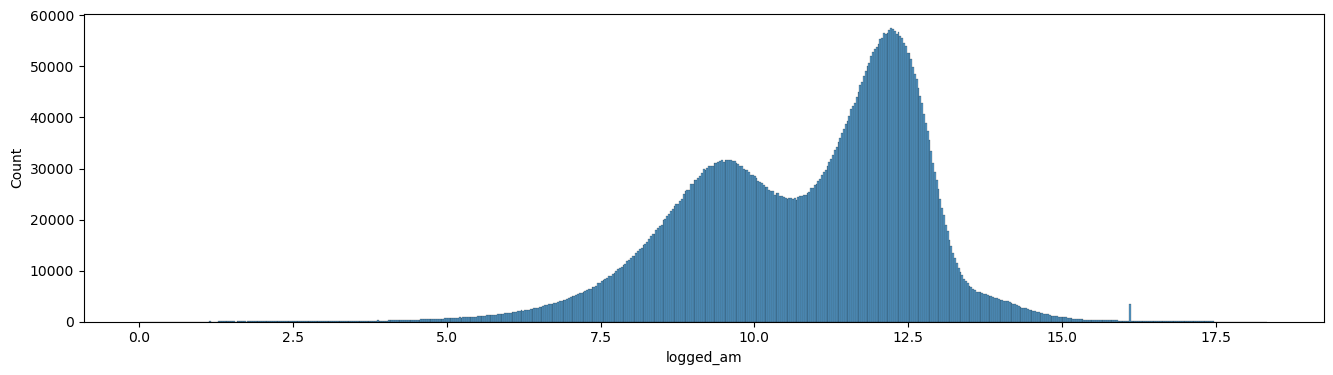

In [118]:
plt.figure(figsize = (16, 4))
sns.histplot(dfml['logged_am'])
plt.show()

In [119]:
dfml.head()

,step,type,amount,isFraud,isFlaggedFraud,type_encoded,logged_am
0,1,PAYMENT,9839.64,0,0,3,9.194276
1,1,PAYMENT,1864.28,0,0,3,7.531166
2,1,TRANSFER,181.00,1,0,4,5.204007
3,1,CASH_OUT,181.00,1,0,1,5.204007
4,1,PAYMENT,11668.14,0,0,3,9.364703


## ML

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [125]:
current_model = dfml['isFlaggedFraud']

In [126]:
y = dfml['isFraud']
X = dfml.drop(['isFraud', 'isFlaggedFraud', 'type', 'amount'], axis=1)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [128]:
print("train X shape :", X_train.shape, "\ntest X shape", X_test.shape, "\ntrain y shape", y_train.shape, "\ntest y shape", y_test.shape)

train X shape : (4453822, 3) 
test X shape (1908782, 3) 
train y shape (4453822,) 
test y shape (1908782,)


In [129]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    #'Random Forest': RandomForestClassifier(n_estimators = 20),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred, zero_division=0))